In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Load the dataset
df = pd.read_csv('./dataset.csv')


In [2]:
# Display the first 5 rows of the dataset
print(df.head())

# Display the summary statistics of the dataset
print(df.describe())

# Check the number of missing values in each column
print(df.isnull().sum())

# Check the data types of each column
print(df.dtypes)


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  87139402         B        12.32         12.39           78.85      464.1   
1   8910251         B        10.60         18.95           69.28      346.4   
2    905520         B        11.04         16.83           70.92      373.2   
3    868871         B        11.28         13.39           73.00      384.8   
4   9012568         B        15.19         13.21           97.65      711.8   

   smoothness_mean  compactness_mean  concavity_mean  points_mean  ...  \
0          0.10280           0.06981         0.03987      0.03700  ...   
1          0.09688           0.11470         0.06387      0.02642  ...   
2          0.10770           0.07804         0.03046      0.02480  ...   
3          0.11640           0.11360         0.04635      0.04796  ...   
4          0.07963           0.06934         0.03393      0.02657  ...   

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \

C:\Users\scorp\AppData\Local\Temp\ipykernel_26740\820955589.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


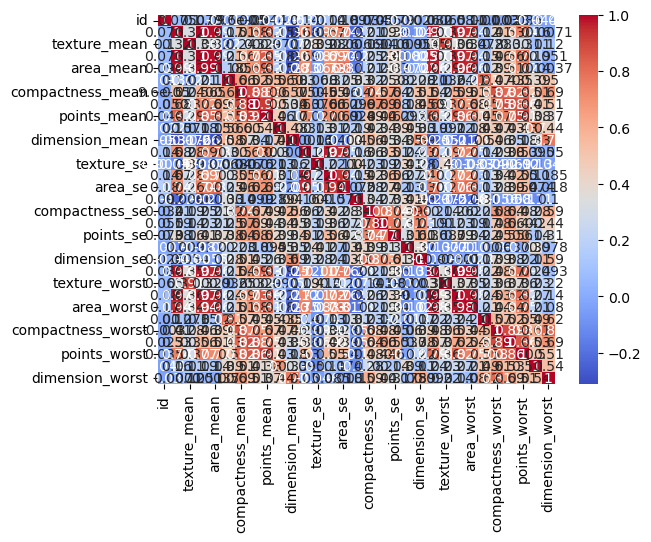

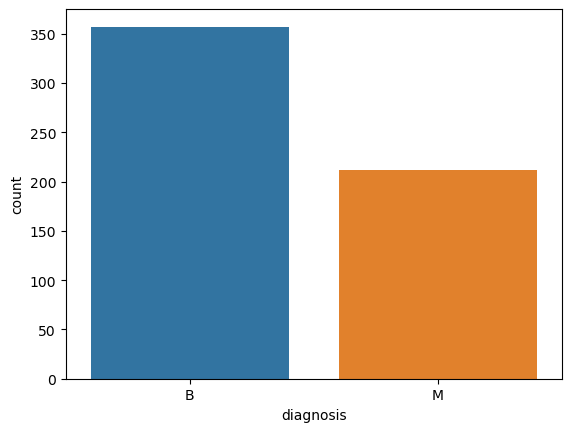

In [ ]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Distribution of the target variable
sns.countplot(x='diagnosis', data=df)
plt.show()

# Distribution of other variables
sns.pairplot(df, hue='diagnosis')
plt.show()


In [ ]:
# Calculate the Z-score for each value in the dataset
z_scores = np.abs(stats.zscore(df))

# Identify the outliers based on the Z-score threshold (e.g., 3)
outliers = np.where(z_scores > 3)

# Remove the outliers from the dataset
df = df[(z_scores < 3).all(axis=1)]


In [ ]:
# Apply Min-Max scaling to each column in the dataset
df = (df - df.min()) / (df.max() - df.min())


In [ ]:
# Remove duplicate lines from the dataset
df = df.drop_duplicates()


In [ ]:
# Importing the necessary library
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('diagnosis', axis=1), df['diagnosis'], test_size=0.2, random_state=42)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('diagnosis', axis=1), df['diagnosis'], test_size=0.2, random_state=42)


In [ ]:
# Create a list of classifiers to test
classifiers = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    KNeighborsClassifier()
]

# Loop through each classifier and calculate its cross-validation score
for classifier in classifiers:
    scores = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f"{classifier.__class__.__name__}: {scores.mean():.4f}")


In [ ]:
# Define the hyperparameters to test
param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a Random Forest Classifier object
rfc = RandomForestClassifier(random_state=42)

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


In [ ]:
# Create a Random Forest Classifier object with the best hyperparameters
rfc = RandomForestClassifier(n_estimators=400, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features='auto', random_state=42)

# Train the Random Forest Classifier on the training set
rfc.fit(X_train, y_train)

# Test the Random Forest Classifier on the testing set
y_pred = rfc.predict(X_test)

# Calculate the accuracy score of the Random Forest Classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
